# Homework 5 Problem 1: CIFAR-10 and Manifold Learning

In [1]:
# Install missing packages
# !pip install umap-learn torchvision scikit-image

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import torchvision
from skimage import color
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from torchvision.datasets import CIFAR10

# Set seed
SEED = 28

/tmp/ipykernel_48209/3200567317.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Download and Checks

We will be using the CIFAR-10 dataset from `torchvision`.

In [3]:
dataset = CIFAR10(root='data/', download=True, transform=torchvision.transforms.ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


There are 50,000 images in the training set.

In [4]:
dataset.data.shape

(50000, 32, 32, 3)

And 10,000 images in the test set.

In [5]:
test_dataset.data.shape

(10000, 32, 32, 3)

The following classes are contained in the dataset.

In [6]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Let's take a look at a sample image.

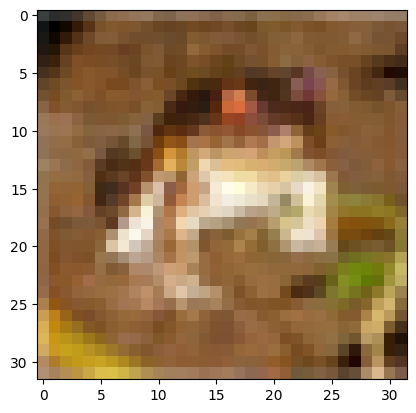

In [7]:
sample_data = dataset.data[0]

plt.imshow(sample_data)  # What is that thing?!?!
plt.show()

Apparently, the image above is that of a frog.

In [8]:
sample_target = dataset.targets[0]
dataset.classes[sample_target]

'frog'

### Data Prep

- Greyscale and flatten all the images.
- Convert the labels to readable labels.
- Select first 1000 data points since notebook kernel cannot handle 50,000 by 50,000 matrix.
- I will not scale the data as the numbers are bounded by 0 and 255.

In [9]:
# Greyscale
train_data = color.rgb2gray(dataset.data)
train_data = train_data.reshape(-1, 32*32)

# Get training label names
train_labels = [ dataset.classes[i] for i in dataset.targets ]
train_labels = np.array(train_labels)

# Get subset of data
train_data = train_data[:1000]
train_labels = train_labels[:1000]

## PCA

In [10]:
pca = PCA(random_state=SEED)
train_data_pca = pca.fit_transform(train_data)

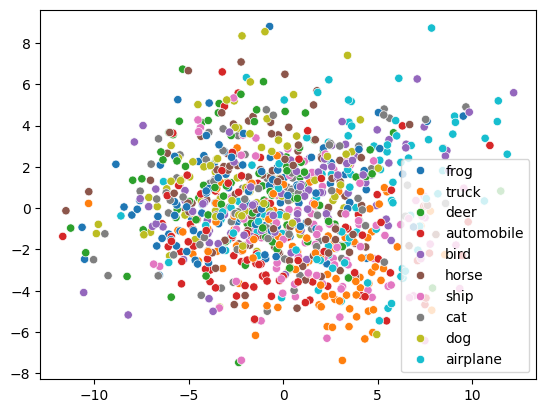

In [11]:
sns.scatterplot(x=train_data_pca[:,0], y=train_data_pca[:, 1], hue=train_labels)
plt.show()

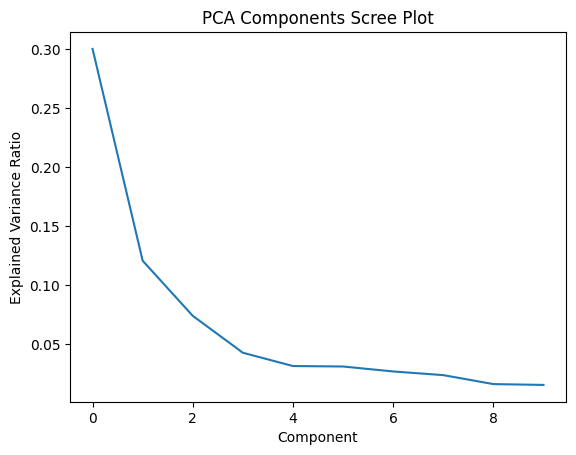

In [12]:
sns.lineplot(pca.explained_variance_ratio_[:10])
plt.title('PCA Components Scree Plot')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

## Isomap

In [13]:
iso = Isomap(n_components=2)
iso_out = iso.fit_transform(train_data)

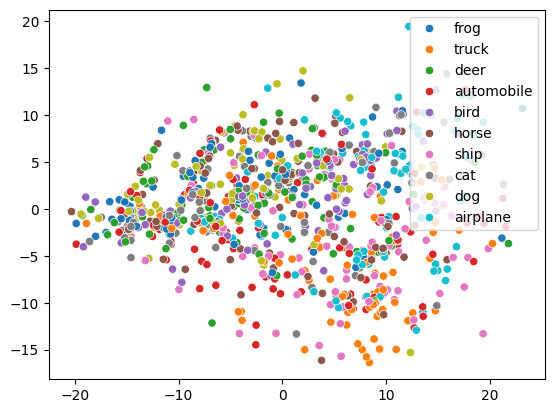

In [14]:
sns.scatterplot(x=iso_out[:,0], y=iso_out[:, 1], hue=train_labels)
plt.show()

## Local Linear Embedding

In [15]:
lle = LocallyLinearEmbedding(n_components=2)
lle_out = lle.fit_transform(train_data)

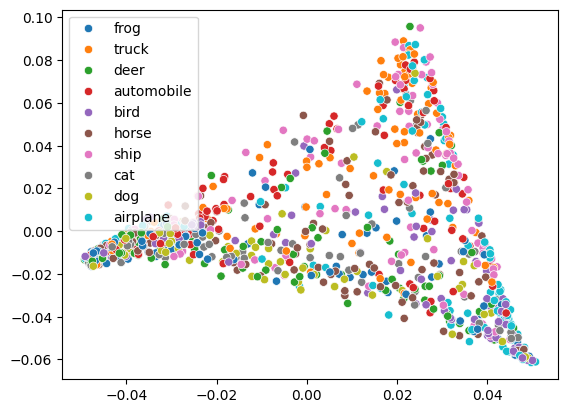

In [16]:
sns.scatterplot(x=lle_out[:,0], y=lle_out[:, 1], hue=train_labels)
plt.show()

## MDS

In [17]:
mds = MDS(n_components=2, random_state=SEED)
mds_out = mds.fit_transform(train_data)

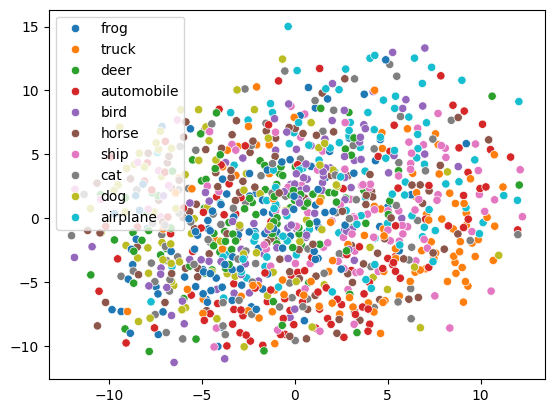

In [18]:
sns.scatterplot(x=mds_out[:,0], y=mds_out[:, 1], hue=train_labels)
plt.show()

## Spectral Embedding

In [19]:
se = SpectralEmbedding(n_components=2)
se_out = se.fit_transform(train_data)

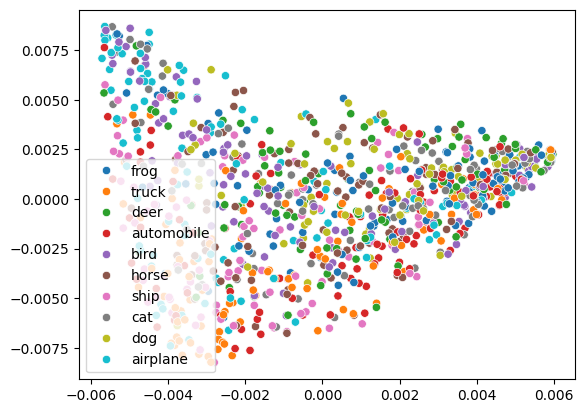

In [20]:
sns.scatterplot(x=se_out[:,0], y=se_out[:, 1], hue=train_labels)
plt.show()

## T-distributed Stochastic Neighbor Embedding

In [21]:
tsne = TSNE(n_components=2)
tsne_out = tsne.fit_transform(train_data)

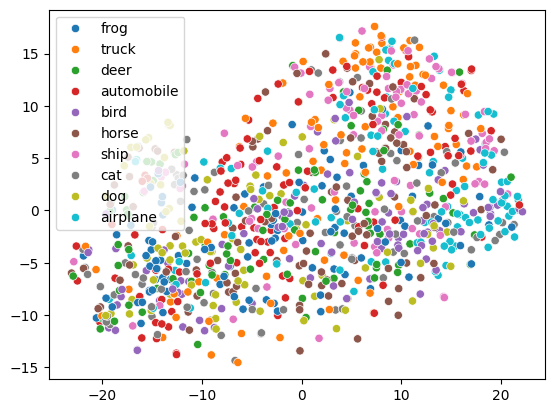

In [22]:
sns.scatterplot(x=tsne_out[:,0], y=tsne_out[:, 1], hue=train_labels)
plt.show()

## UMAP

In [23]:
reducer = umap.UMAP(n_components=2)
umap_out = reducer.fit_transform(train_data)

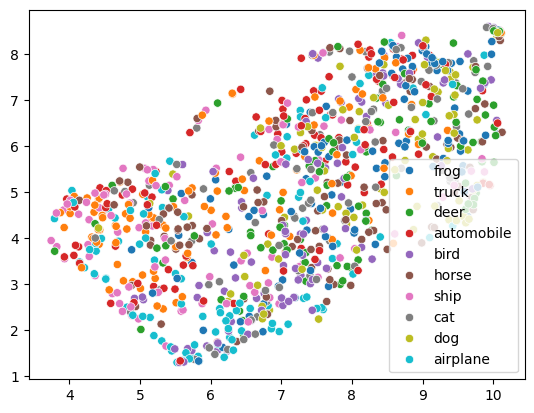

In [24]:
sns.scatterplot(x=umap_out[:,0], y=umap_out[:, 1], hue=train_labels)
plt.show()